In [5]:
import pandas as pd
from datas import *

year = 2021
list_assets, df_assets = get_hs300_stocks(f'{year}-01-01')
dfs= get_all_date_data(f'{year}-01-01', f'{year+1}-01-01', list_assets)


df_all = dfs[['date', 'asset', "close"]]
df_all['date'] = pd.to_datetime(df_all['date'])
# print(df_all)

close = df_all.pivot(index='date', columns='asset', values='close')
# close.index = pd.to_datetime(close.index)
print(close)

login success!
login respond error_code:0
login respond  error_msg:success
query_hs300 error_code:0
query_hs300  error_msg:success
logout success!
300
asset       000001  000002  000063  000066  000069  000100  000157  000166  \
date                                                                         
2021-01-04   18.60   27.78   34.33   20.70    6.89    7.18   10.22    5.27   
2021-01-05   18.17   27.91   34.51   20.65    6.91    7.39   10.75    5.25   
2021-01-06   19.56   28.75   33.63   20.30    6.81    7.28   10.73    5.20   
2021-01-07   19.90   28.79   32.67   19.60    6.71    7.35   11.52    5.22   
2021-01-08   19.85   29.34   33.90   19.66    6.74    7.47   11.86    5.25   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2021-12-27   17.22   19.62   33.13   13.71    7.04    6.18    7.18    5.08   
2021-12-28   17.17   19.68   32.99   13.95    7.04    6.20    7.27    5.11   
2021-12-29   16.75   19.38   32.67   13.96    7.08    6.13    7.18   

<ipython-input-5-e88d292cc3a9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['date'] = pd.to_datetime(df_all['date'])


                     factor
date       asset           
2021-01-04 000001  0.063395
           000002  0.003155
           000063 -8.238868
           000066 -3.308738
           000069  0.224023
...                     ...
2021-12-31 603993 -0.202318
           688008 -0.288842
           688009 -0.002572
           688012  0.950854
           688036 -0.328156

[72900 rows x 1 columns]
Dropped 4.5% entries from factor data: 4.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-77.036272,0.188459,-3.553142,4.925868,13980,20.078418
2,-3.742856,0.849691,-0.409580,0.538032,13912,19.980755
3,-1.335589,2.346479,0.034100,0.322586,13846,19.885964
4,-0.445172,5.035481,0.484248,0.657161,13912,19.980755
5,-0.097047,77.792930,3.360396,4.626093,13977,20.074109


Returns Analysis


,1D,5D,10D
Ann. alpha,0.466,0.260,0.146
beta,-0.032,-0.101,0.100
Mean Period Wise Return Top Quantile (bps),8.675,1.575,-0.011
Mean Period Wise Return Bottom Quantile (bps),-16.080,-7.622,-5.162
Mean Period Wise Spread (bps),24.755,9.186,5.087


<Figure size 432x288 with 0 Axes>

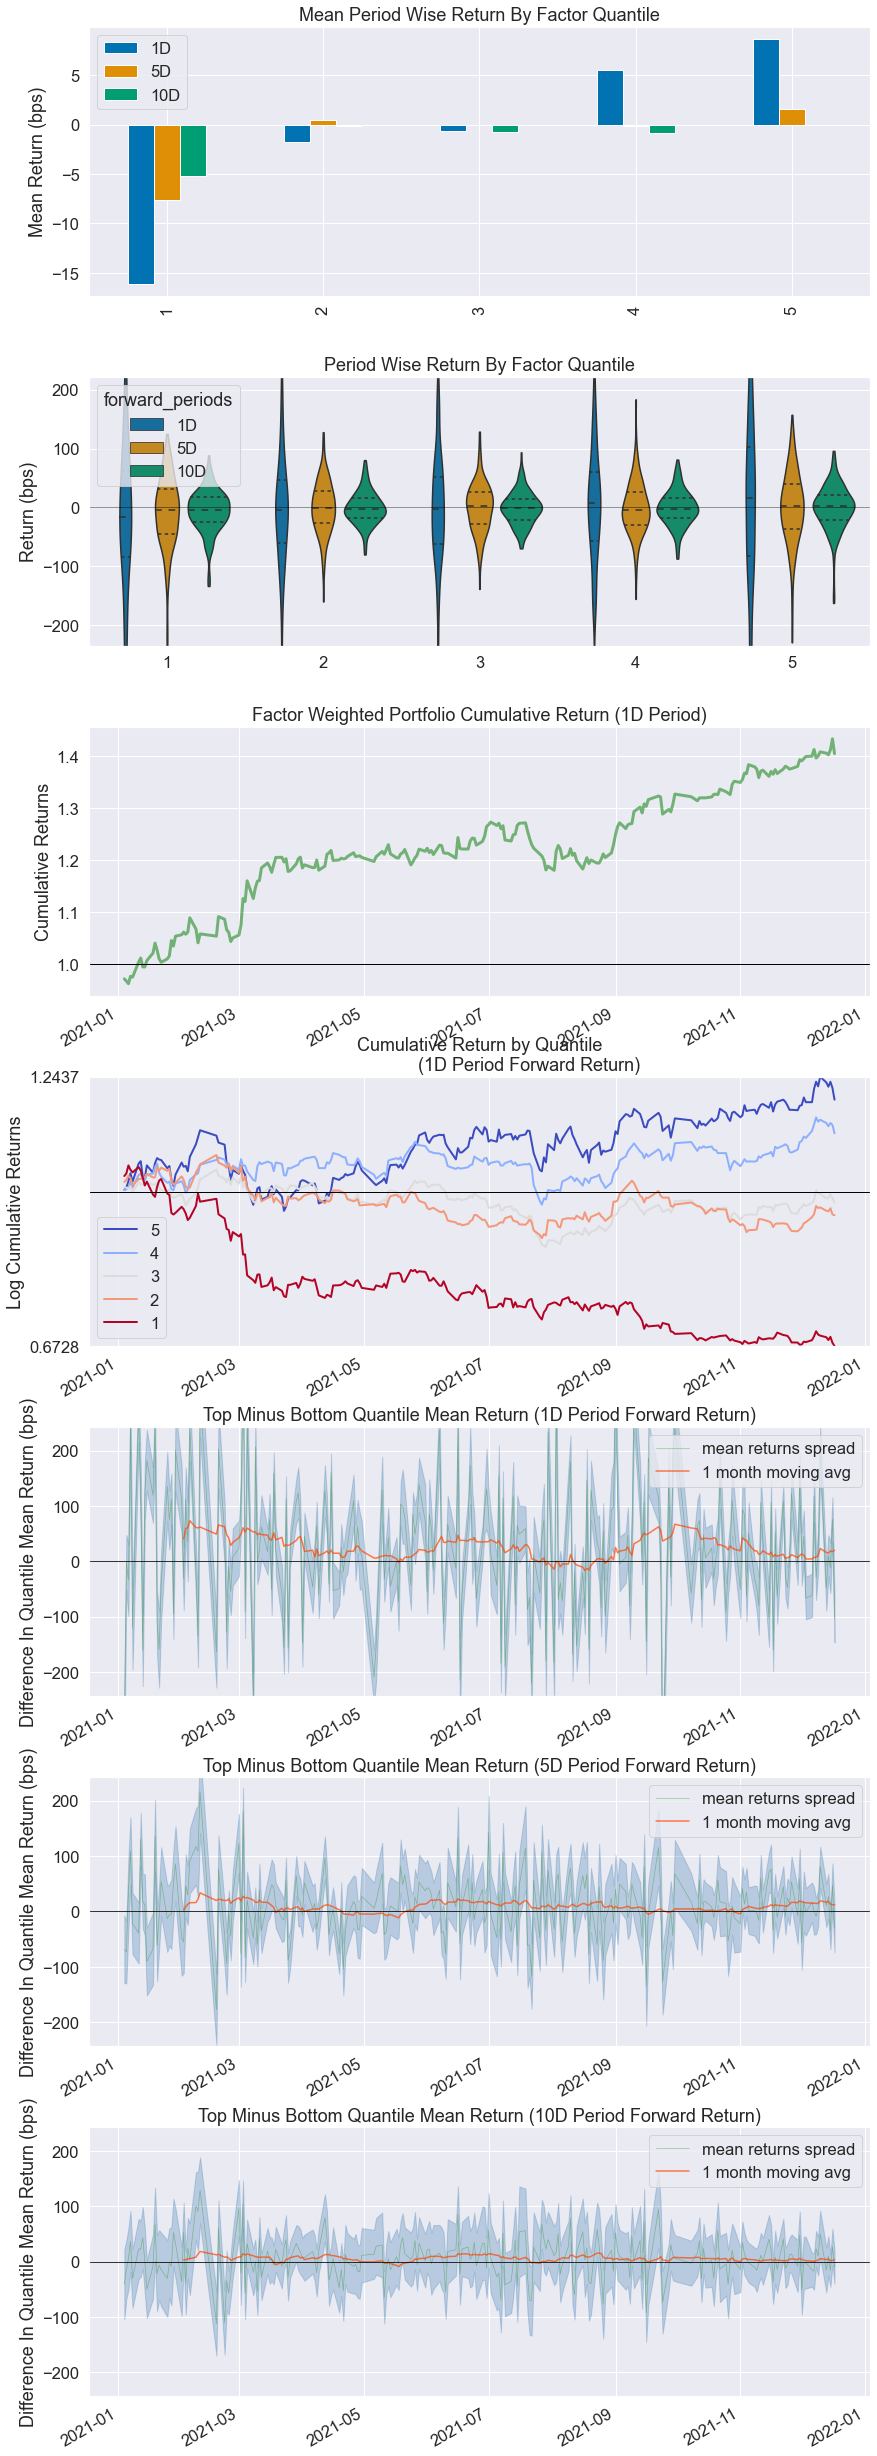

Information Analysis


,1D,5D,10D
IC Mean,0.051,0.022,0.017
IC Std.,0.158,0.167,0.162
Risk-Adjusted IC,0.325,0.134,0.108
t-stat(IC),4.954,2.038,1.650
p-value(IC),0.000,0.043,0.100
IC Skew,0.034,0.144,0.063
IC Kurtosis,-0.261,-0.243,0.045


d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

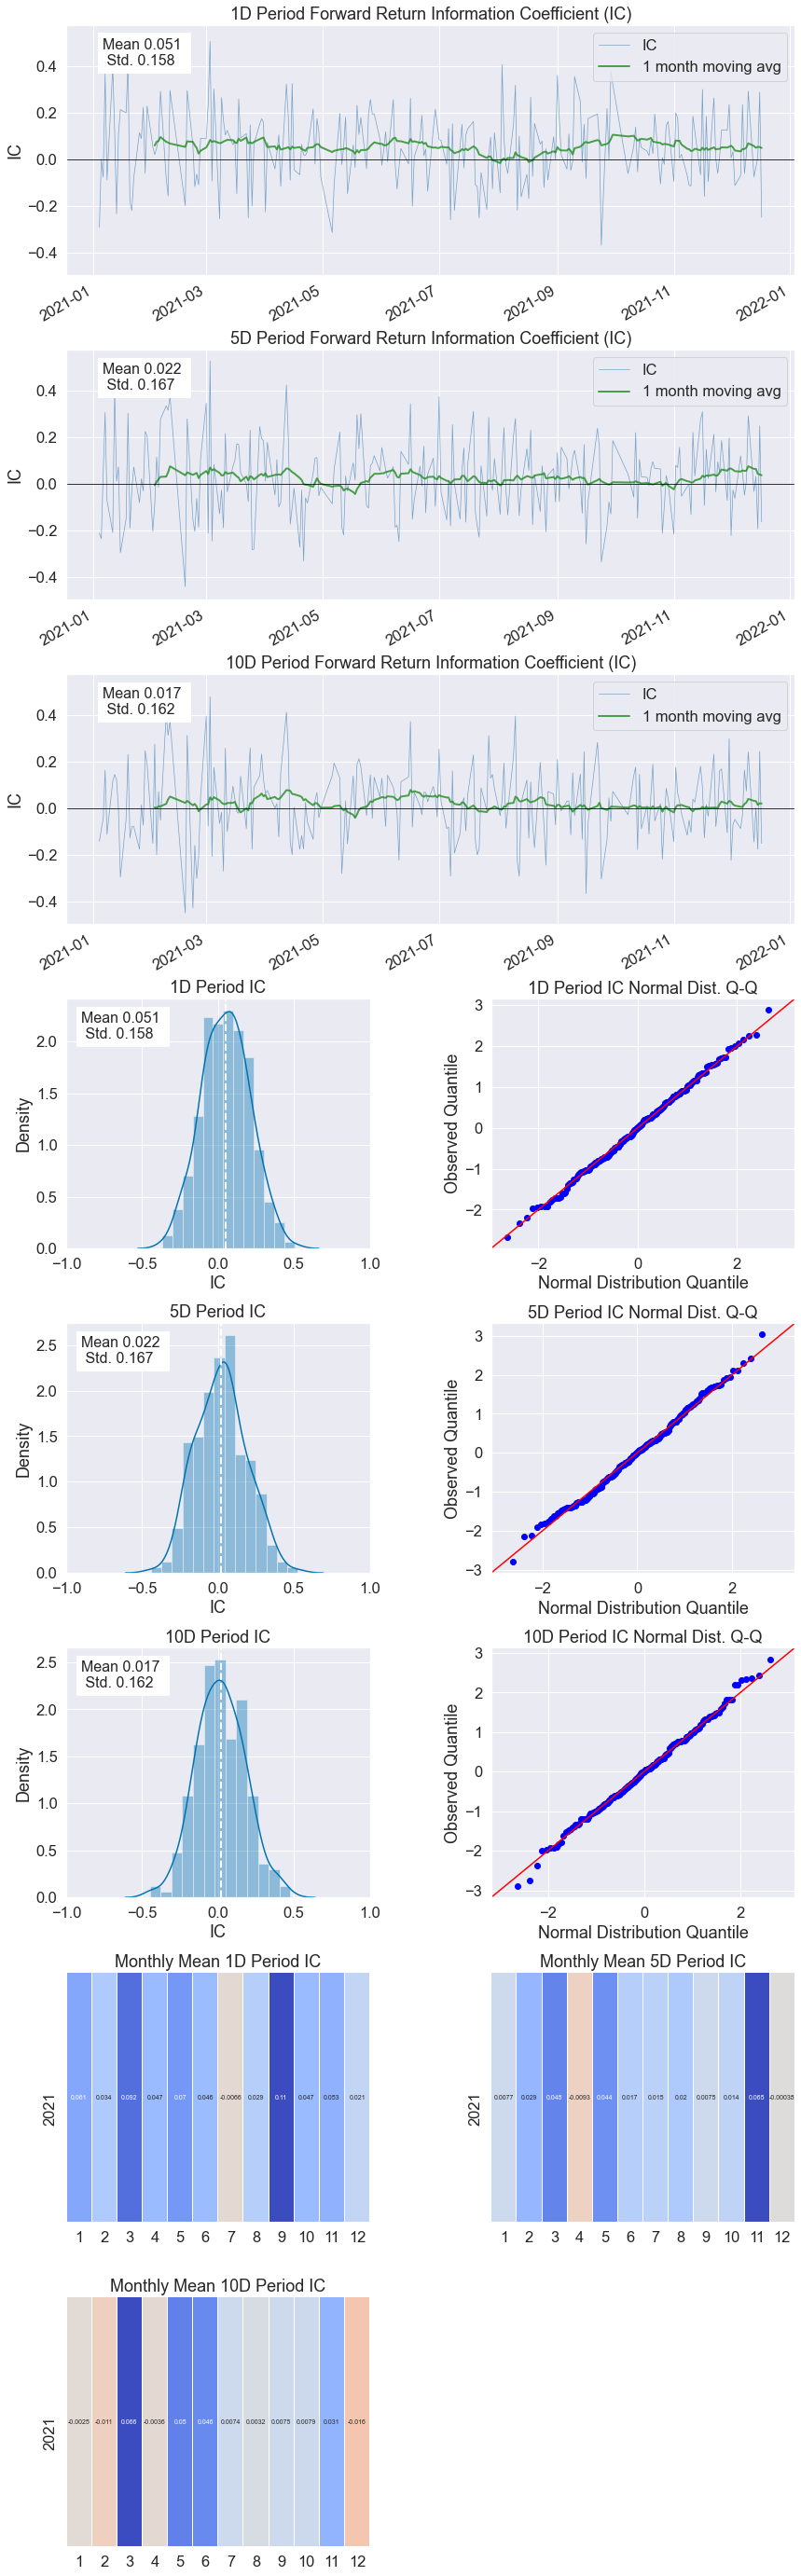

d:\code\StockProject\alphas\alphas\alphalens\utils.py:910: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.709,0.706,0.696
Quantile 2 Mean Turnover,0.779,0.785,0.773
Quantile 3 Mean Turnover,0.700,0.703,0.710
Quantile 4 Mean Turnover,0.774,0.785,0.765
Quantile 5 Mean Turnover,0.713,0.713,0.704


,1D,5D,10D
Mean Factor Rank Autocorrelation,-0.036,-0.022,0.01


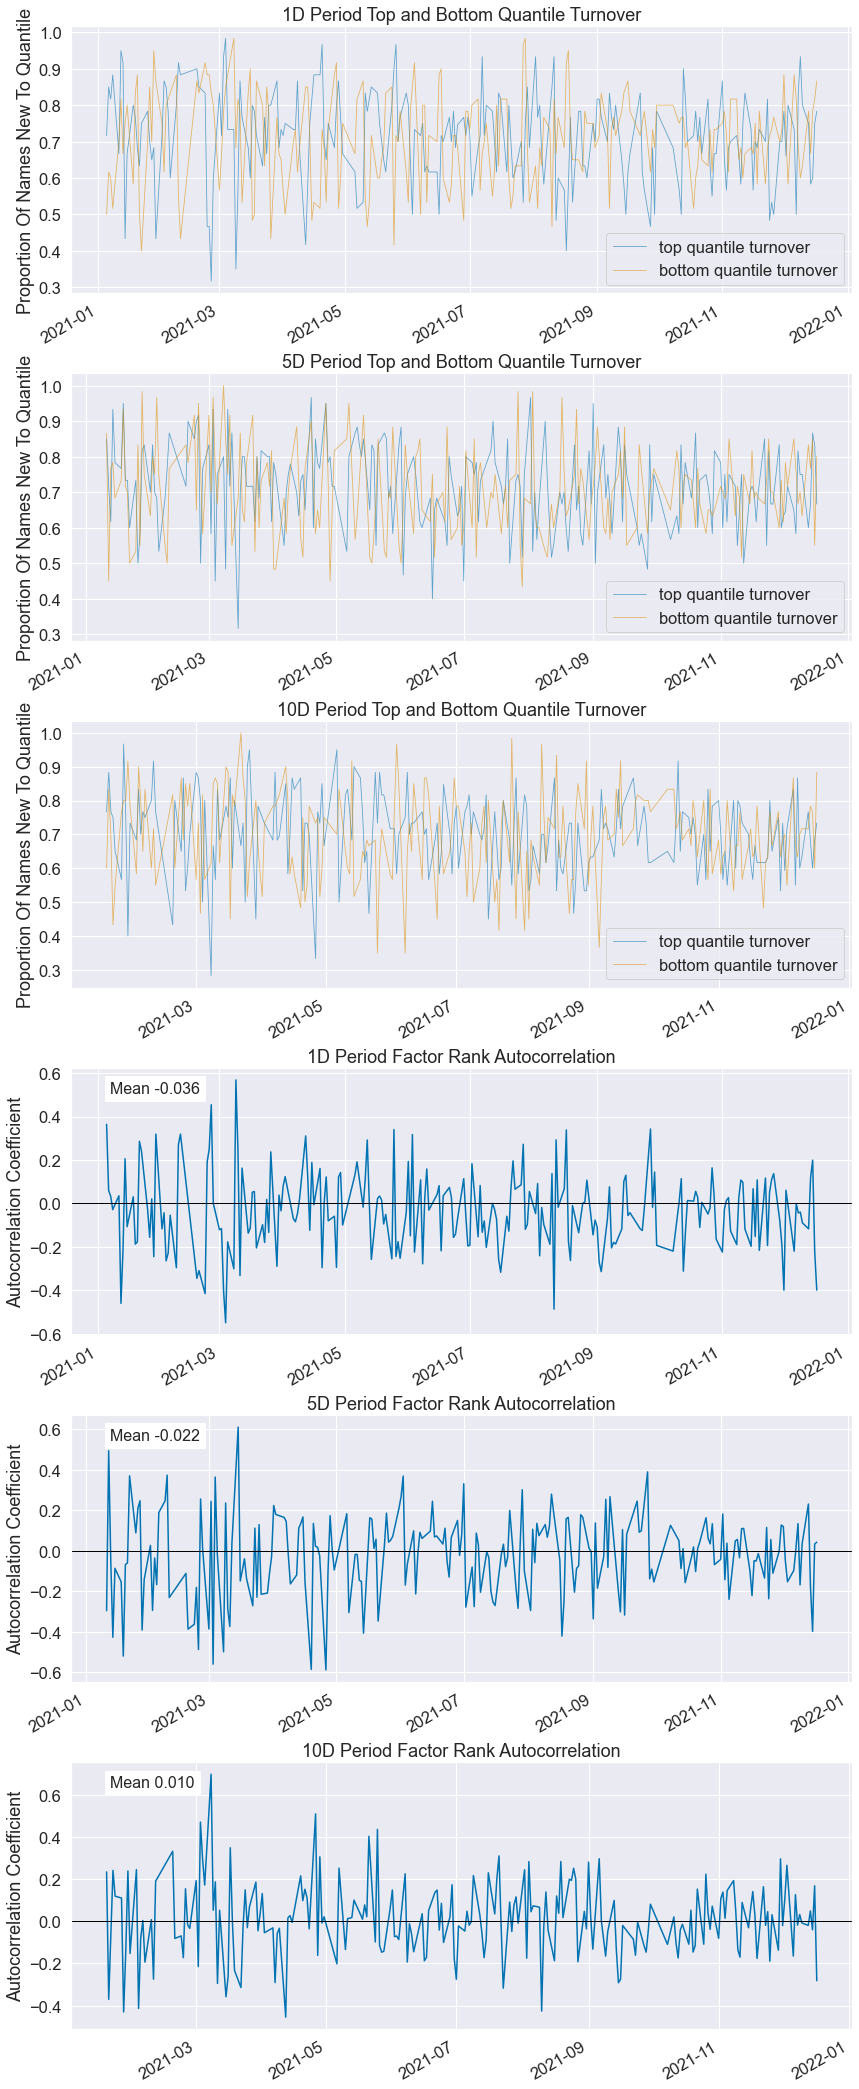

In [6]:
###########################简单现计算的因子#######################################
# alpha = dfs[['date', 'asset', "pctChg"]]
# alpha = alpha.rename(columns={
#         "pctChg": "factor"})
# alpha['date'] = pd.to_datetime(alpha['date'])
# alpha = alpha.set_index(['date', 'asset'], drop=True)
# alpha.sort_index(inplace=True)
# print(alpha)

############################已计算好存在文件中的因子######################################
alpha_num = 83
alpha_name = 'Alphas101'

# 读取已经计算好的因子
alpha = pd.read_csv('alphas/{}/{}/alpha{:03d}.csv'.format(alpha_name, year, alpha_num))

# 筛选出今年的数据，需与股票收盘日期区间一致
alpha = alpha[(alpha['date'] >= f'{year}-01-01') & (alpha['date'] <= f'{year+1}-01-01')]

# 因子矩阵转换为一维数据(alphalens需要的格式)
alpha = alpha.melt(id_vars=['date'], var_name='asset', value_name='factor' )

# date列转为日期格式
alpha['date'] = pd.to_datetime(alpha['date'])
alpha = alpha[['date', 'asset', 'factor']]

# 设置二级索引
alpha = alpha.set_index(['date', 'asset'], drop=True)
alpha.sort_index(inplace=True)
print(alpha)

#############################因子分析#######################################

from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet

ret = get_clean_factor_and_forward_returns(alpha, close,quantiles=5)
create_full_tear_sheet(ret, long_short=False)